# Desafio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


df = pd.read_csv("Credit.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df.value_counts(['Ethnicity'])


Ethnicity       
Caucasian           199
Asian               102
African American     99
dtype: int64

In [2]:
df['African American']=np.where(df['Ethnicity']=='African American',1,0)
df['Caucasian']=np.where(df['Ethnicity']=='Caucasian',1,0)
df['Asian']=np.where(df['Ethnicity']=='Asian',1,0)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Caucasian,Asian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,1,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,1,0,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0,1,0
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,1,0


# Desafio 2

In [3]:
def plot_hist(df,var):
    sns.displot(df[var],kde=True)
    mean=df[var].mean()
    median=df[var].median()
    plt.axvline(mean, color='green', label='media',linestyle='dashed')
    plt.legend()
    plt.axvline(median, color='red',label='mediana',linestyle='dashed')
    plt.legend()

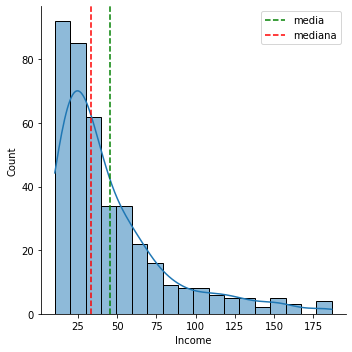

In [4]:
plot_hist(df,'Income')


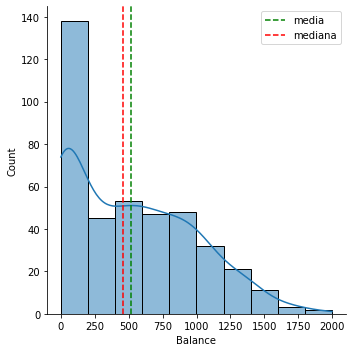

In [5]:
plot_hist(df,'Balance')


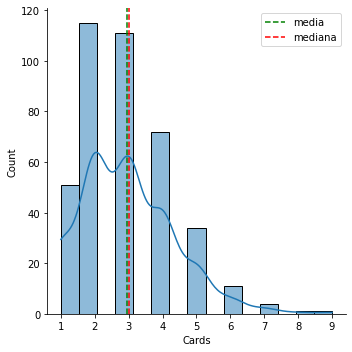

In [6]:
plot_hist(df,'Cards')


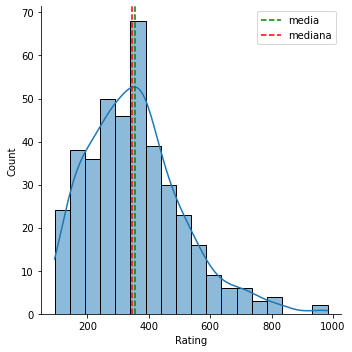

In [7]:
plot_hist(df,'Rating')


### Comportamiento:
Por lo general, hay una mayoria de personas con menores ingresos y balances, que a la vez dichas personas tienen más tarjetas y credito


# Desafio 3

In [8]:
model1=smf.ols('Balance ~ Student', df)
model1=model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.49e-07
Time:                        19:49:36   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model2=smf.ols('Balance ~ Income', df)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.03e-22
Time:                        19:49:36   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model3=smf.ols('Balance ~ Rating', df)
model3=model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          1.90e-120
Time:                        19:49:36   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prueba r
$$r^2_s=6.5%$$
Student(regresor) explica en un 6.5% la variabilidad de Balance(variable dependiente)

$$r^2_i=20%$$
Income(regresor) explica en un 2% la variabilidad de Balance(variable dependiente)

$$r^2_r=7.45%$$
Rating(regresor) explica en un 7.45% la variabilidad de Balance(variable dependiente)

Por lo tanto, Income presenta mayor poder explicativo

# Prueba f
$$f_s=1.49e-07$$
Hay evidencia para rechazar la hipotesis nula ya que por lo menos un coeficiente va a ser distinto de 0

En el primer modelo se sugiere que un estudiante tendrá un balance en promedio de 4803 con el valor critico de 20.499, con 1.96 del 95% se rechaza la hipotesis nula

Para dos estudiantes similares se espera un incremento de 20.866



# Desafio 4

In [11]:
for i,v in df.items():
    if not(i=='Balance' or i=='African American' or i=='Caucasian' or i=='Asian'):
        print('\nBalance ~',i)
        model=smf.ols('Balance ~ '+i, df)
        model=model.fit()
        print(model.summary())


Balance ~ Income
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.03e-22
Time:                        19:49:36   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199  

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 06 Jan 2022   Prob (F-statistic):              0.957
Time:                        19:49:36   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531

$$income: r_2=2.15% $$
$$limit: r_2=0.743%$$
$$rating: r_2=7.46$$
$$cards: r_2=0.7%$$
$$age: r_2=0%$$
$$education: r_2=0%$$
$$gender: r_2=0%$$
$$student: r_2=6.7%$$
$$married: r_2=0%$$
$$ethinicty: r_2=0%$$

la capacidad predictora de todos no es muy efectivo

# Desafio 5

In [12]:
for i,v in df.items():
    if not(i=='Balance' or i=='African American' or i=='Caucasian' or i=='Asian'):
        print('\nBalance ~',i)
        model=smf.ols('Balance ~ '+i, df)
        model=model.fit()
        results=model.summary()
        print(results.tables[1])


Balance ~ Income
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187

Balance ~ Limit
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182

Balance ~ Rating
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714

# Desafio 6

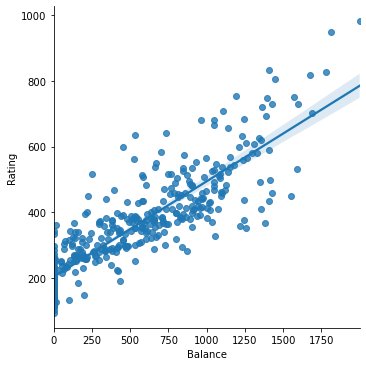

In [13]:
sns.lmplot(x='Balance', y='Rating',data=df)

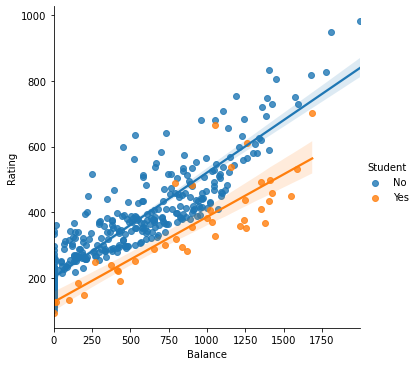

In [14]:
sns.lmplot(x='Balance', y='Rating',hue='Student',data=df)

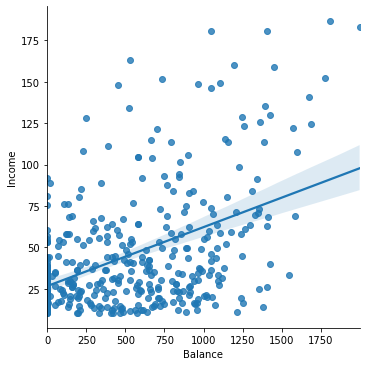

In [15]:
sns.lmplot(x='Balance', y='Income',data=df)

El primero tiene claramente los datos menos dispersos, luego los siguiente